In [2]:
import ddr_tools as ddr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# data
rho = 0.25
sigma_in = 0.1
sigma_ex = 1
phi_datum = lambda x,y: 1.0 # first interface data
                            # second interface data (0)
u_ref = lambda x,y: y       # boundary data
                            # source term (0)
eta = 1e6                   # stability parameter
# load mesh
mesh = ddr.load_square_mesh(filename="square_L1_N5.msh")
#mesh = ddr.load_square_mesh(filename="/home/aspadotto/meshes/square.msh")
# break mesh
ddr.break_mesh(mesh, rho)
# assemble system
G = ddr.assemble_G(mesh, sigma_in,sigma_ex)
S = ddr.assemble_S(mesh)
M_gamma = ddr.assemble_M_gamma(mesh,sigma_in,sigma_ex)
N_gamma = ddr.assemble_N_gamma(mesh)
b_phi = ddr.assemble_b_phi(mesh,phi_datum)
# define system, apply bc conds an solve
A = G+S+eta*N_gamma-np.transpose(M_gamma) # system matrix
b = eta*b_phi
[A, b] = ddr.impose_bc(mesh, A, b, u_ref)
u = np.linalg.solve(A, b)
# calculate error

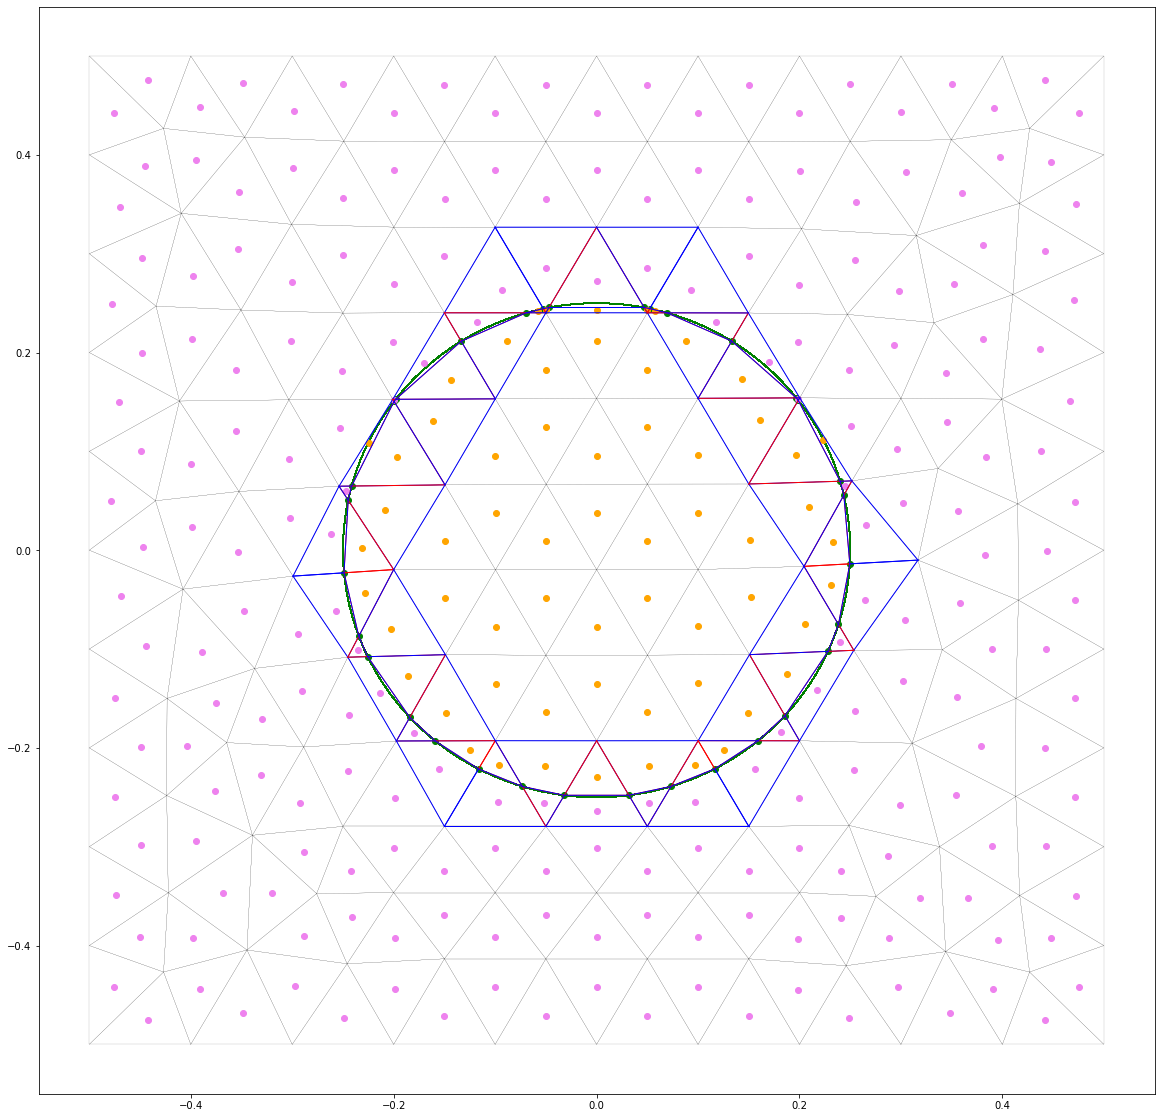

In [19]:
ddr.visualize_mesh(mesh,rho)



In [3]:
b_phi

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.31354229e-05,  8.11064916e-03,  3.69496750e-03,  2.90978088e-03,
       -2.45739177e-03,  5.43576158e-04, -1.49125866e-04,  0.00000000e+00,
       -2.26824541e-03,  5.01532559e-04,  0.00000000e+00,  4.28469374e-04,
       -1.55614835e-03, -1.93347910e-03,  1.18807907e-04,  1.16998168e-03,
       -5.73133890e-03,  3.05850221e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.57777608e-03,  4.24395386e-04,
        6.27546250e-02, -8.22285271e-02, -6.95763111e-02, -8.14207479e-02,
       -7.12233213e-02, -9.98346941e-02, -7.21656113e-02, -5.88556983e-02,
       -8.72344724e-02, -

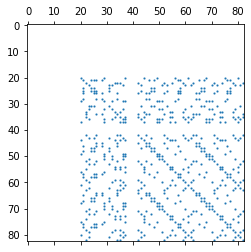

In [4]:
plt.spy(N_gamma,markersize=1)

In [5]:
help(ddr.break_mesh)

Help on function break_mesh in module ddr_tools:

break_mesh()
    Breaks elements cut by the disk. In particular:
    - generates new points and appends them to coords
    - generates new elements and appends them to faces
    - masks elements that are cut and are no more elements of the new mesh
    
    Global variables:
    - faces
    - Nfaces
    - Nfaces_init
    - coords
    - Npoints
    - Npoints_init
    - cut_faces
    - side_mask
    
    CONVENTION FOR CONNECTIVITY:
    - generated points appended
    - generated faces appended
    - cut_faces[ifa] = 0 ==> ifa is not intersected
    - cut faces[ifa] = 1 ==> ifa is intersected and deactivated
    - cut_faces[ifa] = 2 ==> ifa is generated by brek_mesh and may not be a triangle
                         ==> faces[ifa,0:1] are generated points

